In [93]:
import pandas as pd
viewingActivityDataFrame = pd.read_csv('netflix-report/CONTENT_INTERACTION/ViewingActivity.csv')
viewingActivityDataFrame.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ojas,2021-02-15 02:43:17,00:04:55,Autoplayed: user action: Unspecified;,LEGO Ninjago: Season 2: Racer Seven (Episode 10),NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:05:12,00:05:12,US (United States)
1,Ojas,2021-02-15 02:42:32,00:00:10,NaN,Robot Trains: Season 2: Emergency! Somebody he...,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:01:40,00:01:40,US (United States)
2,Ojas,2021-02-15 02:20:14,00:22:17,NaN,Robot Trains: Season 1: Train World Is In Dang...,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:23:47,00:23:47,US (United States)
3,Ojas,2021-02-15 02:02:32,00:17:38,Autoplayed: user action: Unspecified;,Robot Trains: Season 1: Faltering Friendship (...,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:23:54,00:23:54,US (United States)
4,Ojas,2021-02-15 01:54:39,00:07:37,Autoplayed: user action: Unspecified;,Pac-Man and the Ghostly Adventures: Season 1: ...,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:07:59,00:07:59,US (United States)


,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Ojas,2021-02-15 02:43:17,00:04:55,Autoplayed: user action: Unspecified;,LEGO Ninjago: Season 2: Racer Seven (Episode 10),NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:05:12,00:05:12,US (United States)
1,Ojas,2021-02-15 02:42:32,00:00:10,NaN,Robot Trains: Season 2: Emergency! Somebody he...,NaN,Samsung 2017 Kant-M UHD TV Smart TV,00:01:40,00:01:40,US (United States)


In [51]:
viewingActivityDataFrame.shape

(24301, 10)

In [52]:
viewingActivityDataFrame = viewingActivityDataFrame.drop(['Profile Name','Attributes','Supplemental Video Type','Device Type','Country','Bookmark','Latest Bookmark'], axias=1)

In [53]:
viewingActivityDataFrame.head(100)

,Start Time,Duration,Title
0,2021-02-15 02:43:17,00:04:55,LEGO Ninjago: Season 2: Racer Seven (Episode 10)
1,2021-02-15 02:42:32,00:00:10,Robot Trains: Season 2: Emergency! Somebody he...
2,2021-02-15 02:20:14,00:22:17,Robot Trains: Season 1: Train World Is In Dang...
3,2021-02-15 02:02:32,00:17:38,Robot Trains: Season 1: Faltering Friendship (...
4,2021-02-15 01:54:39,00:07:37,Pac-Man and the Ghostly Adventures: Season 1: ...
...,...,...,...
95,2021-01-18 19:52:58,00:21:09,The Deep: Season 2: Hidden Secrets (Episode 8)
96,2021-01-18 19:40:08,00:12:43,The Deep: Season 2: Beware the Sentinels (Epis...
97,2021-01-18 00:59:43,00:09:37,The Deep: Season 2: Beware the Sentinels (Epis...
98,2021-01-18 00:52:53,00:06:47,The Deep: Season 2: Finn Comes Aboard (Episode 6)


In [54]:
viewingActivityDataFrame['Title'] = viewingActivityDataFrame['Title'].str.split(':').str[0]

In [55]:
viewingActivityDataFrame.head(10)

,Start Time,Duration,Title
0,2021-02-15 02:43:17,00:04:55,LEGO Ninjago
1,2021-02-15 02:42:32,00:00:10,Robot Trains
2,2021-02-15 02:20:14,00:22:17,Robot Trains
3,2021-02-15 02:02:32,00:17:38,Robot Trains
4,2021-02-15 01:54:39,00:07:37,Pac-Man and the Ghostly Adventures
5,2021-02-15 01:54:11,00:00:03,Jurassic World Camp Cretaceous
6,2021-02-13 06:34:03,00:23:32,Jurassic World Camp Cretaceous
7,2021-02-13 06:11:36,00:22:25,Jurassic World Camp Cretaceous
8,2021-02-13 05:49:14,00:22:14,Jurassic World Camp Cretaceous
9,2021-02-13 05:41:23,00:04:46,Robot Trains


In [56]:
viewingActivityDataFrame.dtypes

Start Time    object
Duration      object
Title         object
dtype: object

In [57]:
viewingActivityDataFrame['Start Time'] = pd.to_datetime(viewingActivityDataFrame['Start Time'], utc = True)

In [58]:
viewingActivityDataFrame.dtypes

Start Time    datetime64[ns, UTC]
Duration                   object
Title                      object
dtype: object

In [59]:
# change the Start Time column into the dataframe's index
viewingActivityDataFrame = viewingActivityDataFrame.set_index('Start Time')
# convert from UTC timezone to eastern time
viewingActivityDataFrame.index = viewingActivityDataFrame.index.tz_convert('US/Eastern')
# reset the index so that Start Time becomes a column again
viewingActivityDataFrame = viewingActivityDataFrame.reset_index()
#double-check that it worked
viewingActivityDataFrame.head(1)

,Start Time,Duration,Title
0,2021-02-14 21:43:17-05:00,00:04:55,LEGO Ninjago


In [60]:
viewingActivityDataFrame['Duration']= pd.to_timedelta(viewingActivityDataFrame['Duration'])
viewingActivityDataFrame.dtypes

Start Time    datetime64[ns, US/Eastern]
Duration                 timedelta64[ns]
Title                             object
dtype: object

In [79]:
friends = viewingActivityDataFrame[viewingActivityDataFrame['Title'].str.contains('^Lost$',regex=True)]
friends.shape

(150, 3)

In [80]:
friends = friends[(friends['Duration']> '0 days 00:01:00')]
friends.shape

(146, 3)

In [81]:
friends['Duration'].sum()

Timedelta('3 days 10:17:58')

In [82]:
friends['weekday'] = friends['Start Time'].dt.weekday
friends['hour'] = friends['Start Time'].dt.hour
friends.head(20)

,Start Time,Duration,Title,weekday,hour
21495,2013-10-17 21:01:47-04:00,00:04:02,Lost,3,21
21496,2013-10-17 20:59:09-04:00,00:01:57,Lost,3,20
21497,2013-10-17 20:56:48-04:00,00:01:43,Lost,3,20
22806,2012-10-09 23:42:34-04:00,00:04:12,Lost,1,23
23851,2012-02-29 00:12:44-05:00,01:30:49,Lost,2,0
23852,2012-02-28 23:33:04-05:00,00:38:45,Lost,1,23
23853,2012-02-28 22:54:15-05:00,00:37:16,Lost,1,22
23854,2012-02-28 22:13:30-05:00,00:39:44,Lost,1,22
23855,2012-02-28 21:42:17-05:00,00:30:44,Lost,1,21
23856,2012-02-28 21:09:32-05:00,00:06:17,Lost,1,21


In [83]:
friends['title_new'] = friends['Title'].str.split(':').str[0]

In [84]:
friends.head(10)

,Start Time,Duration,Title,weekday,hour,title_new
21495,2013-10-17 21:01:47-04:00,00:04:02,Lost,3,21,Lost
21496,2013-10-17 20:59:09-04:00,00:01:57,Lost,3,20,Lost
21497,2013-10-17 20:56:48-04:00,00:01:43,Lost,3,20,Lost
22806,2012-10-09 23:42:34-04:00,00:04:12,Lost,1,23,Lost
23851,2012-02-29 00:12:44-05:00,01:30:49,Lost,2,0,Lost
23852,2012-02-28 23:33:04-05:00,00:38:45,Lost,1,23,Lost
23853,2012-02-28 22:54:15-05:00,00:37:16,Lost,1,22,Lost
23854,2012-02-28 22:13:30-05:00,00:39:44,Lost,1,22,Lost
23855,2012-02-28 21:42:17-05:00,00:30:44,Lost,1,21,Lost
23856,2012-02-28 21:09:32-05:00,00:06:17,Lost,1,21,Lost


In [85]:
%matplotlib inline
import matplotlib

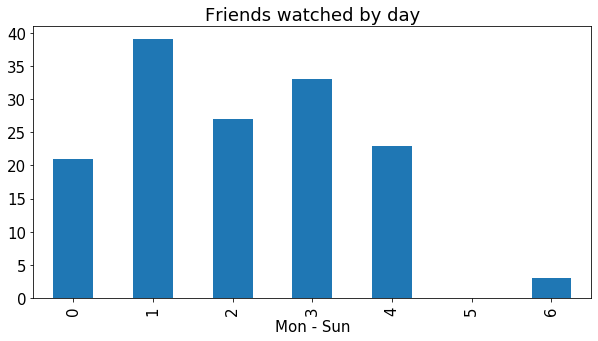

In [86]:
# set our categorical and define the order so the days are plotted Monday-Sunday
friends['weekday']=pd.Categorical(friends['weekday'],categories=[0,1,2,3,4,5,6],ordered=True)
# create friends_by_day and count the rows for each weekday, assigning the result to that variable
friends_by_day = friends['weekday'].value_counts()
# sort the index using our categorical, so that Monday (0) is first, Tuesday (1) is second, etc.
friends_by_day = friends_by_day.sort_index()
# optional:update the font size to make it a bit larger and easier to read
matplotlib.rcParams.update({'font.size':15})
# plot friends_by_day as a bar chart with the listed size,title and label
g= friends_by_day.plot(kind='bar', figsize=(10,5), title = 'Friends watched by day');
g.set_xlabel('Mon - Sun');


Text(0.5, 0, 'Views By Hour - AM to PM')

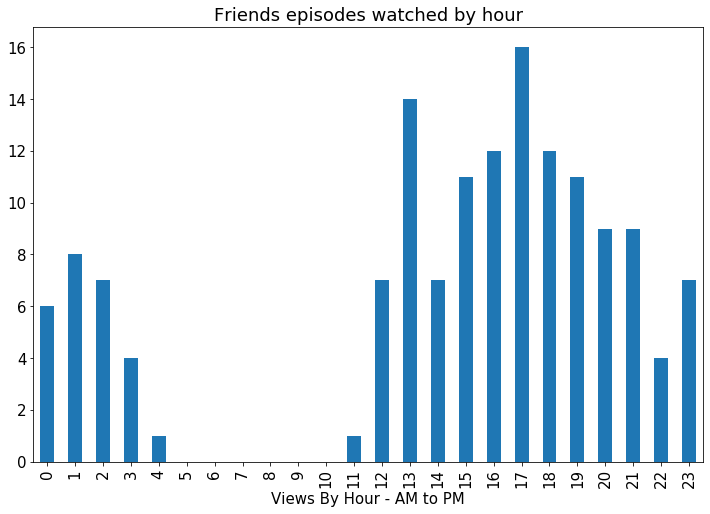

In [87]:
# set our categorical and define the order so the hours are plotted 0-23
friends['hour'] = pd.Categorical(friends['hour'],categories=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],ordered=True)
# create friends_by_hour and count the rows for each hour, assigning the result to that variable
friends_by_hour = friends['hour'].value_counts()
# sort the index using our categorical, so that midnight (0) is first, 1 a.m. (1) is second, etc.
friends_by_hour = friends_by_hour.sort_index()
# plot office_by_hour as a bar chart with the listed size,title and label
h=friends_by_hour.plot(kind='bar', figsize=(12,8), title = 'Friends episodes watched by hour');
h.set_xlabel('Views By Hour - AM to PM')